In [1]:
import numpy as np
from pathlib import Path
from astropy import stats
from astropy import units as u
from astropy.modeling import models, fitting

import warnings
from astropy.utils.exceptions import AstropyDeprecationWarning
warnings.simplefilter('ignore', category=AstropyDeprecationWarning)

from keckdata import KeckData, KeckDataList, fits_reader, analysis

In [ ]:
## HIRES

p_2019oct11 = Path('/Volumes/JOSHW/HIRES/2019oct11')
files = sorted([f for f in p_2019oct11.glob('*fits')])
p_2019oct12 = Path('/Volumes/JOSHW/HIRES/2019oct12')
files.extend( sorted([f for f in p_2019oct12.glob('*fits')]) )
kdl_biasesdarks = KeckDataList(files, verbose=False)

p_2019oct19 = Path('/Volumes/JOSHW/HIRES/2019oct19')
files = sorted([f for f in p_2019oct19.glob('hires*.fits')])
kdl_flats = KeckDataList(files, verbose=False)

RN = analysis.determine_read_noise(kdl_biasesdarks, plot=True, trim=256)
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r:.2f}")

master_bias = analysis.make_master_bias(kdl_biasesdarks)
DC = analysis.determine_dark_current(kdl_biasesdarks, master_bias=master_bias, plot=True, trim=256, nozero=True)
for i,d in enumerate(DC):
    print(f"Dark Current (ext {i}) = {d:.4f}")
del(kdl_biasesdarks)

g = analysis.determine_gain(kdl_flats, master_bias=master_bias, read_noise=RN, trim=256, aduthreshold=25000, plot=True)
for i,gi in enumerate(g):
    print(f"Gain (ext {i}) = {gi:.2f}")

for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r*g[i]:.2f}")
for i,d in enumerate(DC):
    print(f"Dark Current (ext {i}) = {d*g[i]:.4f}")

del(kdl_flats)

## 2019 Nov 06

In [ ]:
p_2019nov06 = Path('/Volumes/JOSHW/HIRES/2019nov06')
files = sorted([f for f in p_2019nov06.glob('hires*.fits')])

kdl = KeckDataList(files, verbose=False)
print(kdl.len)

In [ ]:
RN = analysis.determine_read_noise(kdl, plot=True, trim=256)
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r:.2f}")

In [ ]:
master_bias = analysis.make_master_bias(kdl)
DC = analysis.determine_dark_current(kdl, master_bias=master_bias, plot=True, trim=256, nozero=True)
for i,d in enumerate(DC):
    print(f"Dark Current (ext {i}) = {d:.4f}")

In [ ]:
g = analysis.determine_gain(kdl, master_bias=master_bias, read_noise=RN, trim=256, aduthreshold=25000, plot=True)
for i,gi in enumerate(g):
    print(f"Gain (ext {i}) = {gi:.2f}")

for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r*g[i]:.2f}")
for i,d in enumerate(DC):
    print(f"Dark Current (ext {i}) = {d*g[i]:.4f}")

## 2019 Nov 12

In [9]:
p_2019nov12 = Path('/Volumes/JOSHW/HIRES/2019nov12')

all_files = sorted([f for f in p_2019nov12.glob('hires*.fits')])
all_kdl = KeckDataList(all_files, verbose=False)
print(all_kdl.len)

flats1_files = sorted([p_2019nov12.joinpath(f"hires{n:04d}.fits") for n in range(102,164)])
flats1_kdl = KeckDataList(flats1_files, verbose=False)
print(flats1_kdl.len)

flats2_files = sorted([p_2019nov12.joinpath(f"hires{n:04d}.fits") for n in range(167,206)])
flats2_kdl = KeckDataList(flats2_files, verbose=False)
print(flats2_kdl.len)

119
62
39


2019-11-14 16:36:32     INFO: Determining read noise
2019-11-14 16:36:32     INFO:   Checking that all inputs are BIAS frames
2019-11-14 16:36:32     INFO:   Found 13 biases
2019-11-14 16:36:32     INFO: Making master bias from 12 frames
2019-11-14 16:36:32     INFO: Making master bias for each of 3 extensions
2019-11-14 16:37:00     INFO:   Done
2019-11-14 16:37:01     INFO:   Determining read noise for each of 3 extensions
2019-11-14 16:37:02     INFO:   Read Noise is 1.34 adu for extension 1
2019-11-14 16:37:02     INFO:   Generating plot for: hires0218.fits, frame 0
2019-11-14 16:37:03     INFO:   Generating read noise plot: read_noise_HIRES_ext0.png
2019-11-14 16:37:07     INFO:   Read Noise is 1.28 adu for extension 2
2019-11-14 16:37:07     INFO:   Generating plot for: hires0218.fits, frame 1
2019-11-14 16:37:08     INFO:   Generating read noise plot: read_noise_HIRES_ext1.png
2019-11-14 16:37:11     INFO:   Read Noise is 1.31 adu for extension 3
2019-11-14 16:37:11     INFO:   

Read Noise (ext 0) = 1.34 adu
Read Noise (ext 1) = 1.28 adu
Read Noise (ext 2) = 1.31 adu


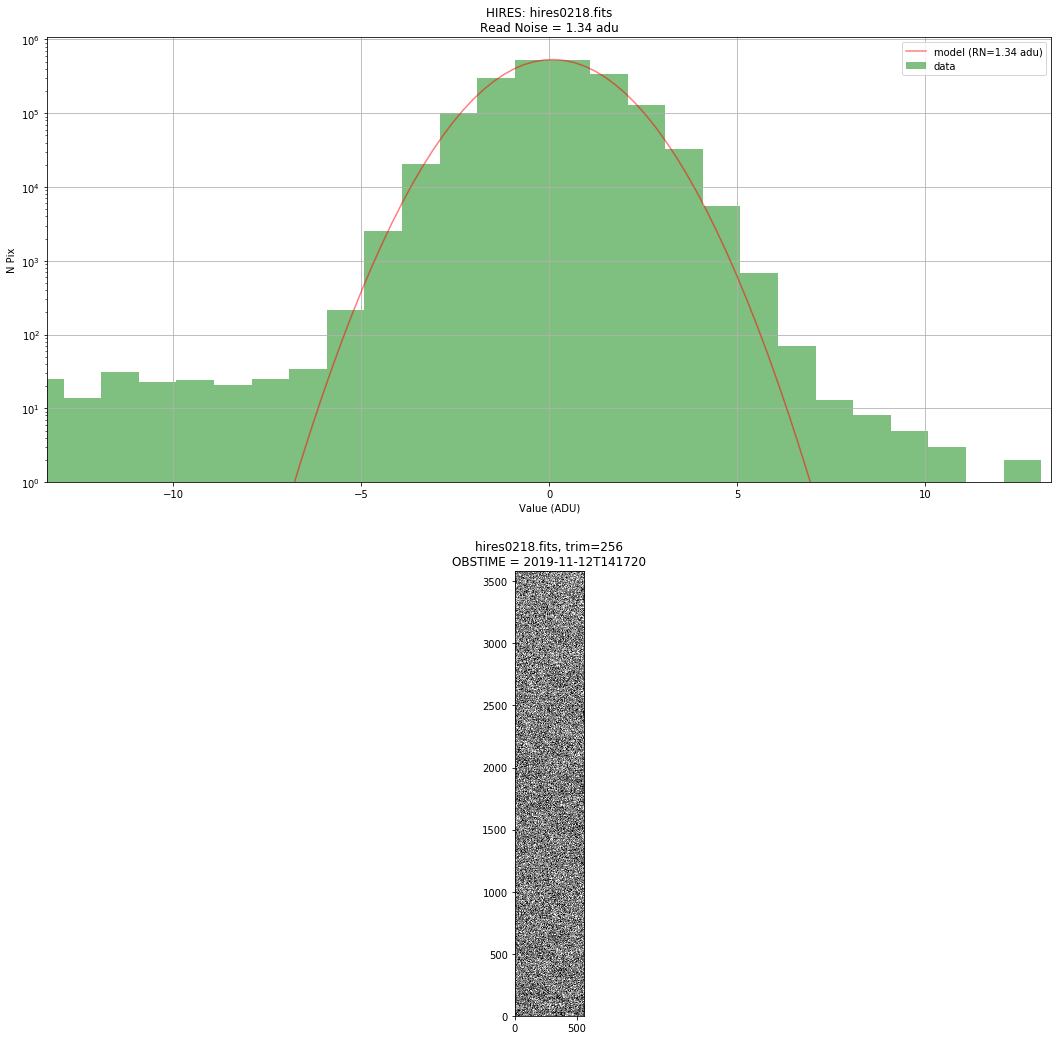

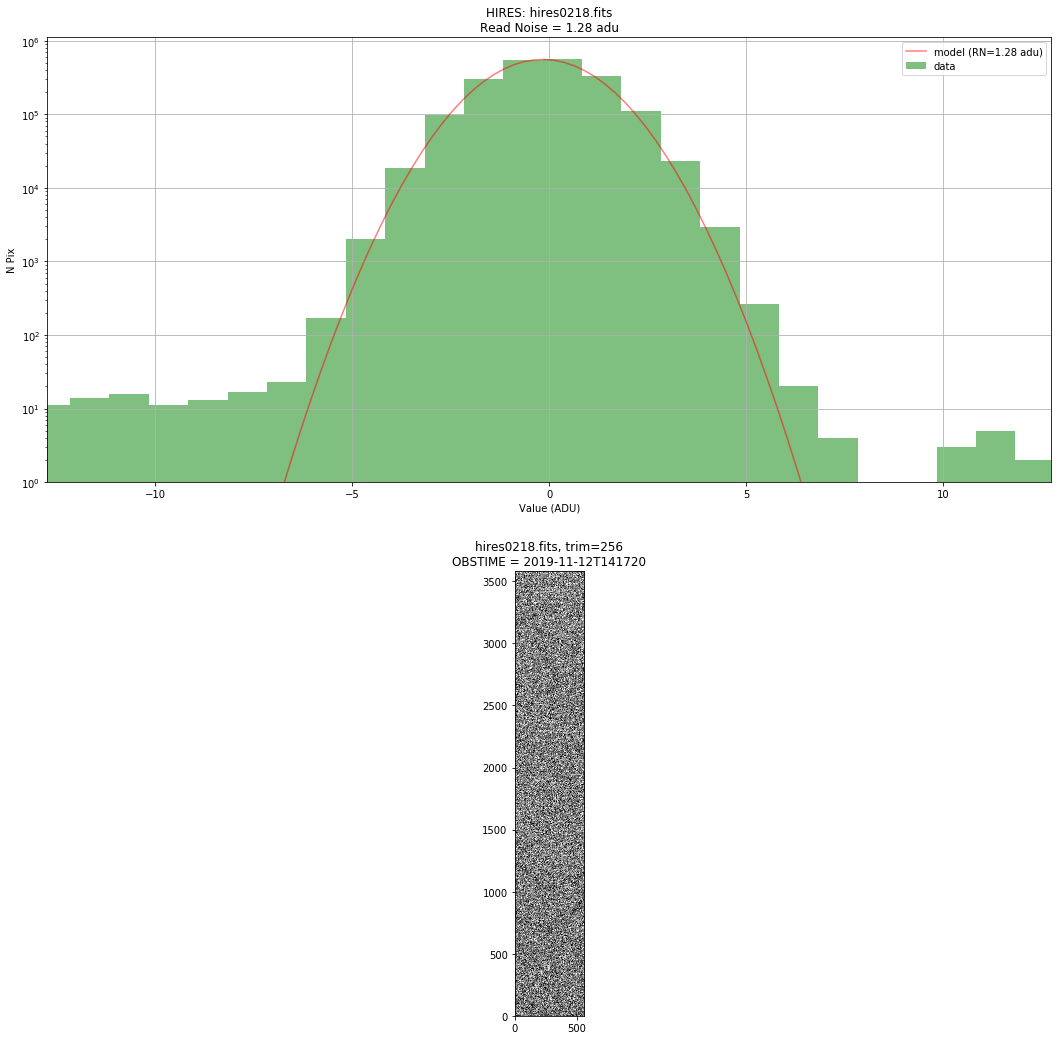

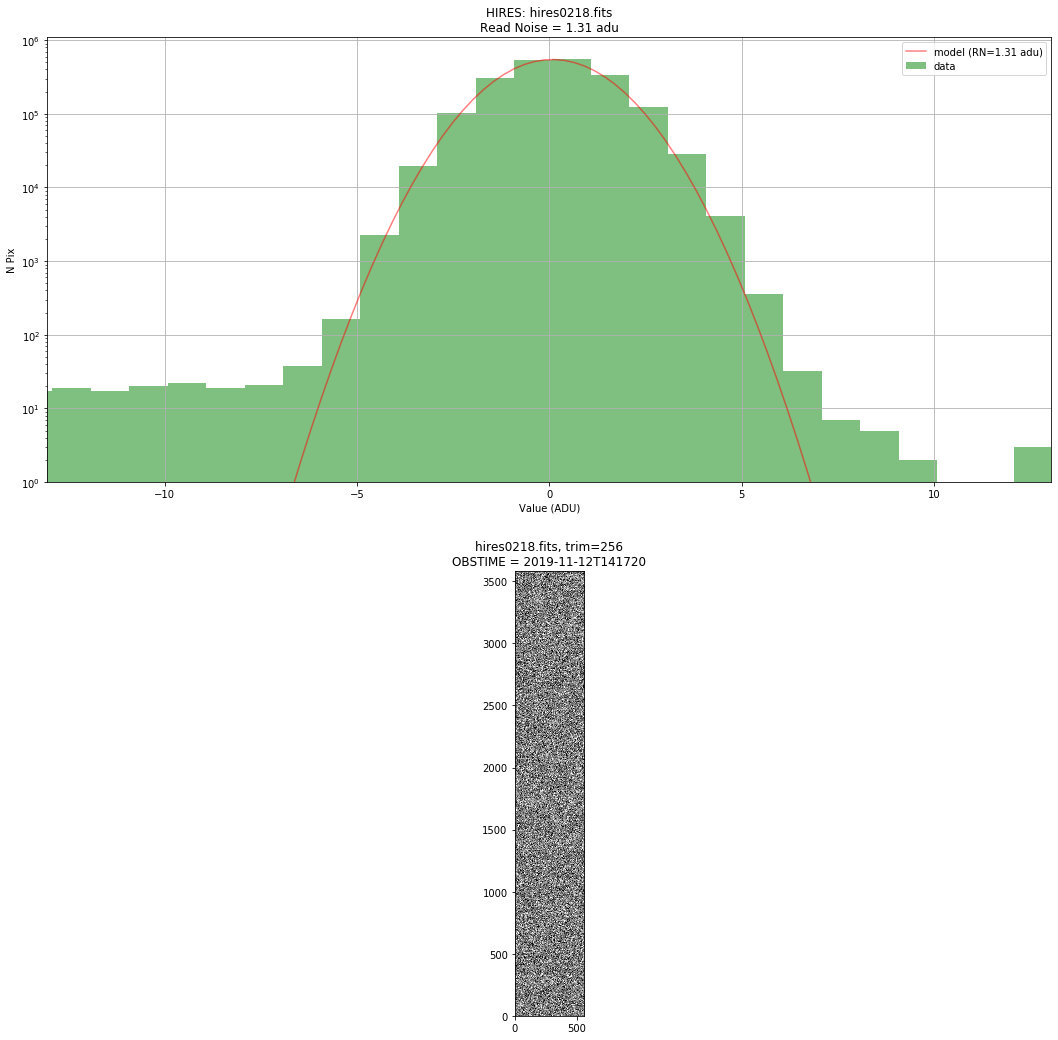

In [10]:
RN = analysis.determine_read_noise(all_kdl, plot=True, trim=256)
master_bias = analysis.make_master_bias(all_kdl)
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r:.2f}")

2019-11-14 16:37:52     INFO: Determining gain
2019-11-14 16:37:52     INFO: Step 1: Get image statistics for 62 flat frames
2019-11-14 16:37:52     INFO: Each frame has 3 extensions
2019-11-14 16:38:53     INFO: Step 2: Analyze image differences at each of 13 exposure times
2019-11-14 16:38:53     INFO:   Measuring statistics for 5 15s flats
2019-11-14 16:38:57     INFO:   Measuring statistics for 5 25s flats
2019-11-14 16:39:01     INFO:   Measuring statistics for 5 35s flats
2019-11-14 16:39:04     INFO:   Measuring statistics for 5 45s flats
2019-11-14 16:39:07     INFO:   Measuring statistics for 5 55s flats
2019-11-14 16:39:10     INFO:   Measuring statistics for 5 75s flats
2019-11-14 16:39:12     INFO:   Measuring statistics for 5 95s flats
2019-11-14 16:39:14     INFO:   Measuring statistics for 5 110s flats
2019-11-14 16:39:16     INFO:   Measuring statistics for 5 150s flats
2019-11-14 16:39:18     INFO:   Measuring statistics for 5 190s flats
2019-11-14 16:39:20     INFO:  

Gain (ext 0) = 2.04 electron / adu
Gain (ext 1) = 2.14 electron / adu
Gain (ext 2) = 2.16 electron / adu
Read Noise (ext 0) = 2.73 electron
Read Noise (ext 1) = 2.73 electron
Read Noise (ext 2) = 2.82 electron


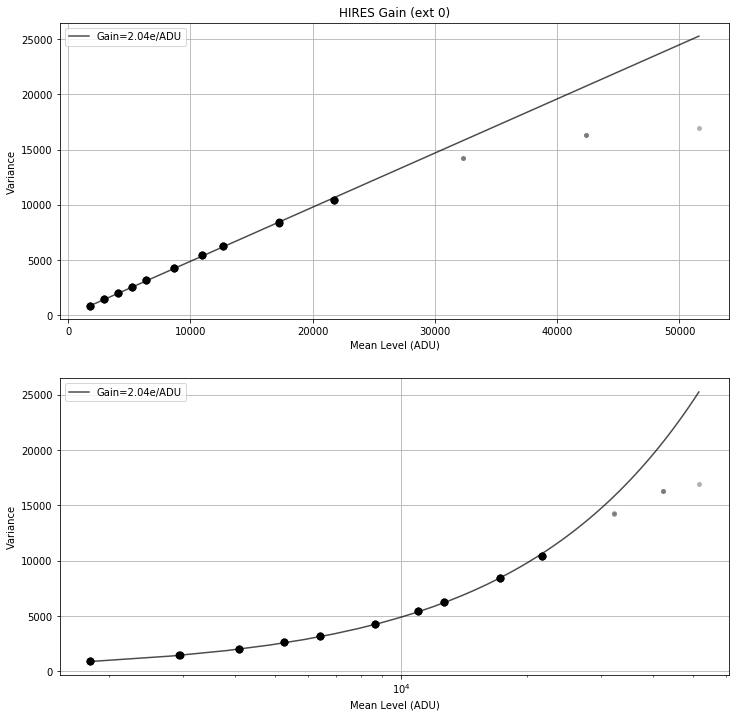

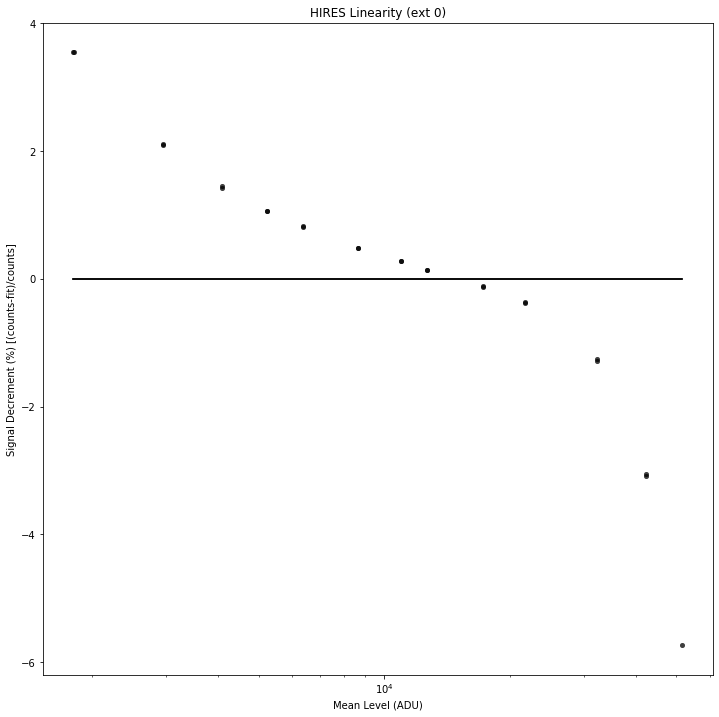

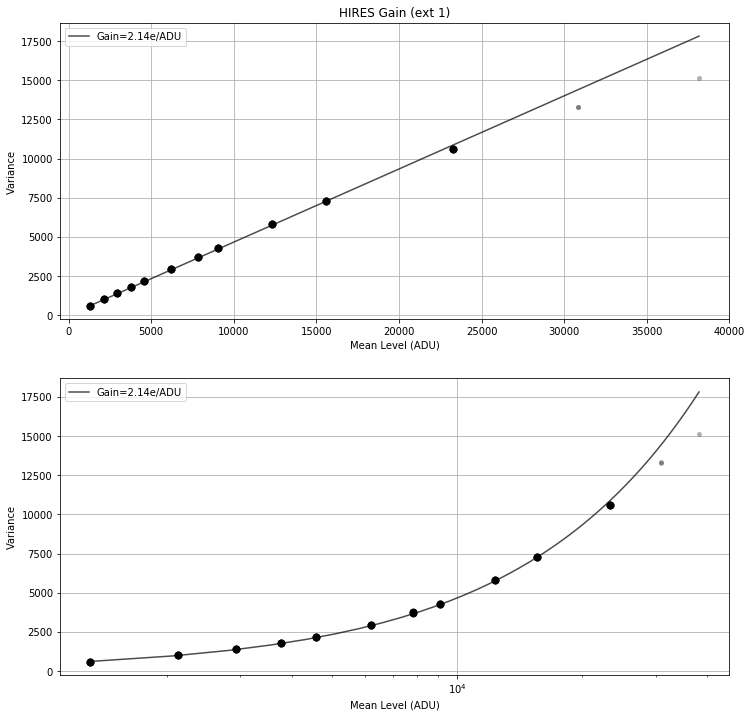

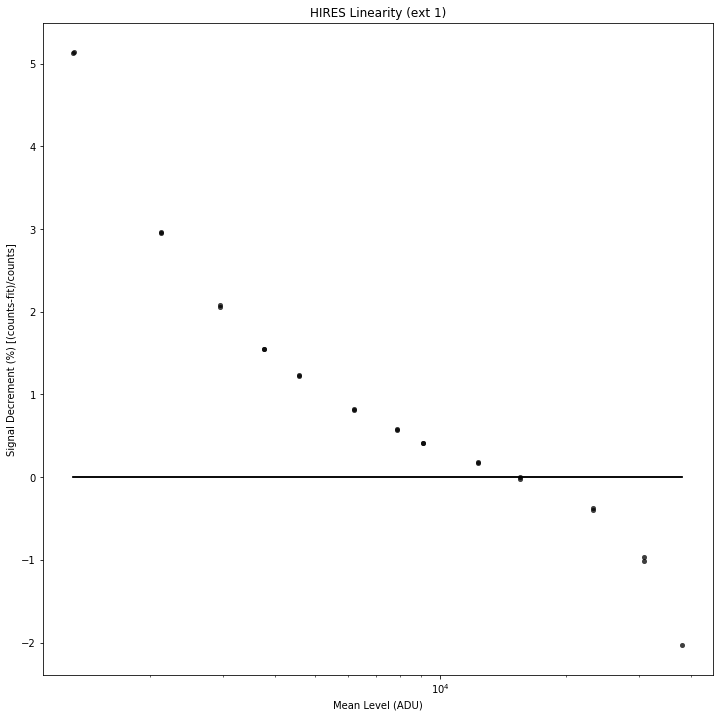

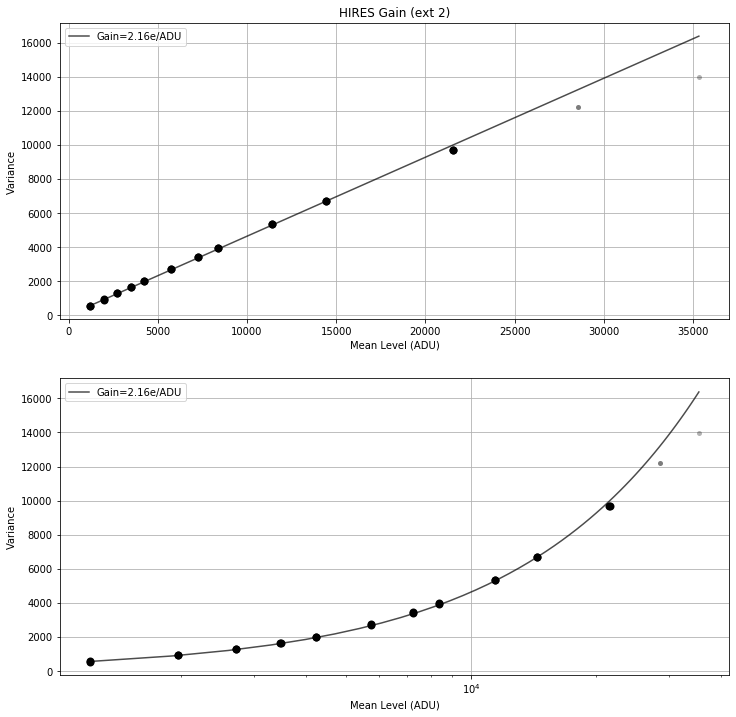

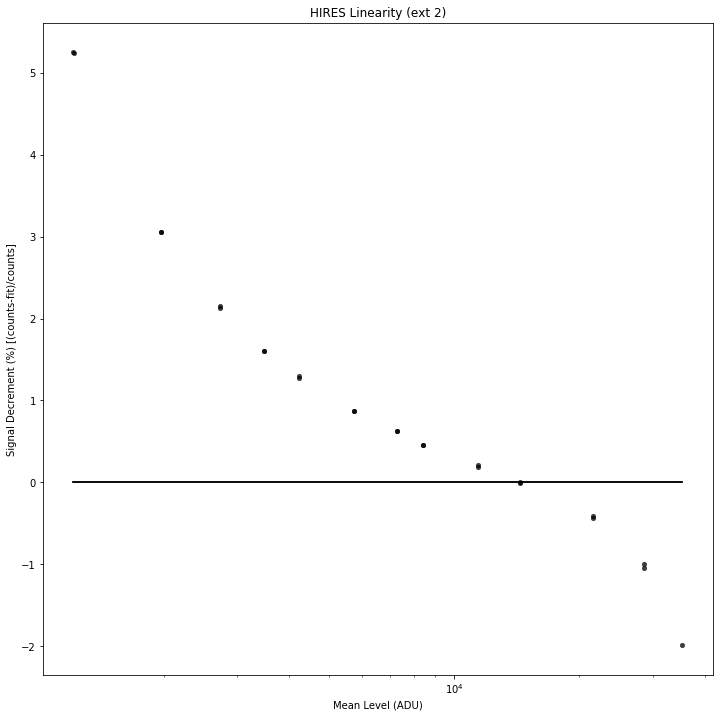

In [11]:
g = analysis.determine_gain(flats1_kdl, master_bias=master_bias, read_noise=RN, trim=256, aduthreshold=25000, plot=True)
for i,gi in enumerate(g):
    print(f"Gain (ext {i}) = {gi:.2f}")
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r*g[i]:.2f}")

2019-11-14 16:39:31     INFO: Determining gain
2019-11-14 16:39:31     INFO: Step 1: Get image statistics for 39 flat frames
2019-11-14 16:39:31     INFO: Each frame has 3 extensions
2019-11-14 16:40:23     INFO: Step 2: Analyze image differences at each of 13 exposure times
2019-11-14 16:40:23     INFO:   Measuring statistics for 3 4s flats
2019-11-14 16:40:24     INFO:   Measuring statistics for 3 8s flats
2019-11-14 16:40:25     INFO:   Measuring statistics for 3 10s flats
2019-11-14 16:40:27     INFO:   Measuring statistics for 3 14s flats
2019-11-14 16:40:28     INFO:   Measuring statistics for 3 16s flats
2019-11-14 16:40:30     INFO:   Measuring statistics for 3 22s flats
2019-11-14 16:40:31     INFO:   Measuring statistics for 3 28s flats
2019-11-14 16:40:33     INFO:   Measuring statistics for 3 34s flats
2019-11-14 16:40:34     INFO:   Measuring statistics for 3 44s flats
2019-11-14 16:40:35     INFO:   Measuring statistics for 3 56s flats
2019-11-14 16:40:37     INFO:   Meas

Gain (ext 0) = 2.05 electron / adu
Gain (ext 1) = 2.14 electron / adu
Gain (ext 2) = 2.15 electron / adu
Read Noise (ext 0) = 2.74 electron
Read Noise (ext 1) = 2.72 electron
Read Noise (ext 2) = 2.81 electron


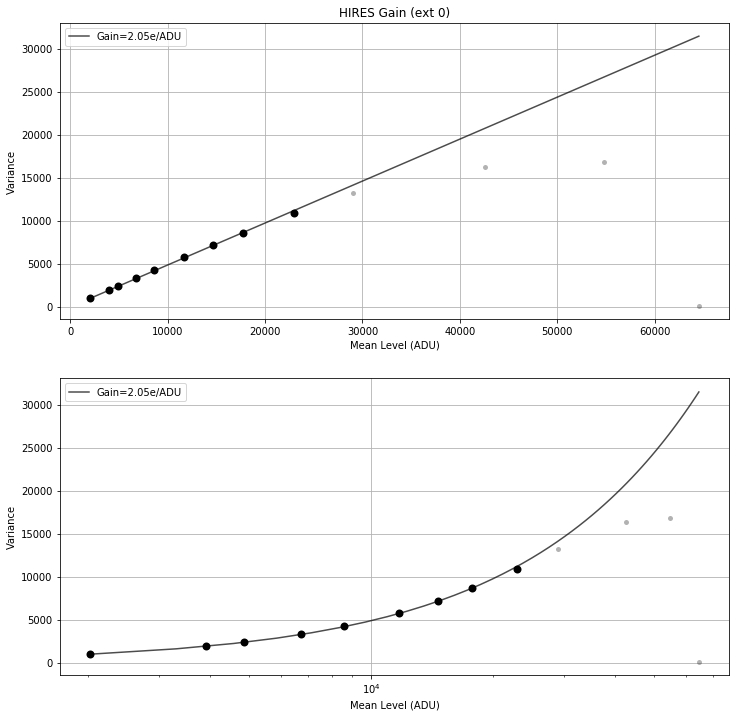

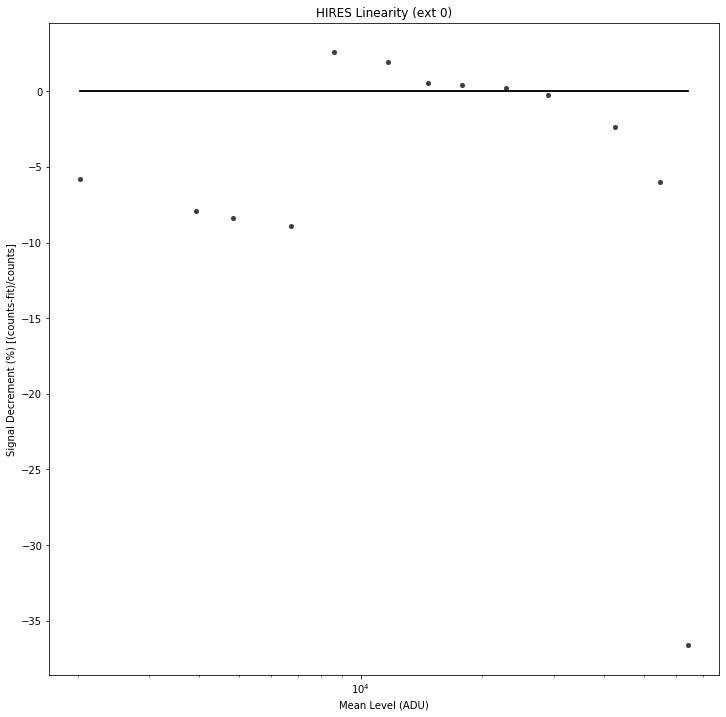

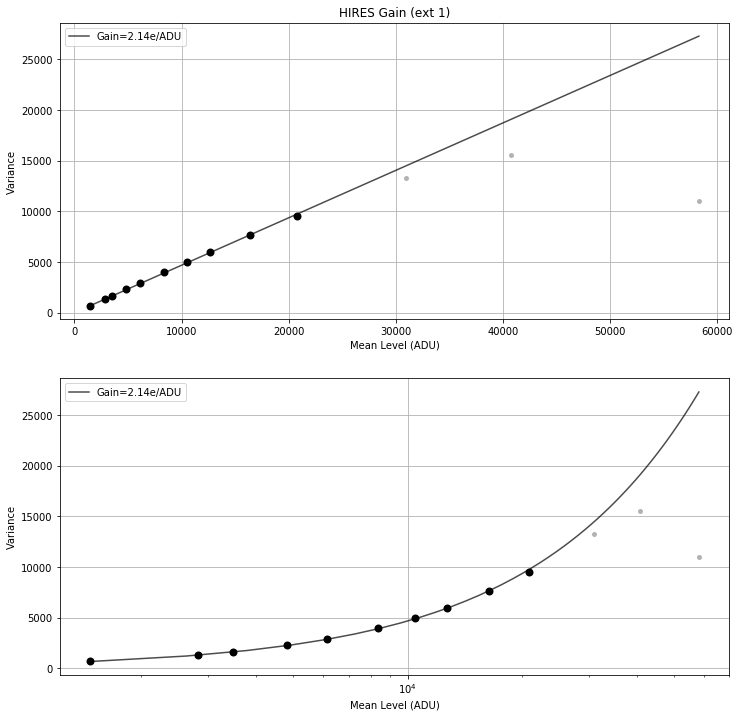

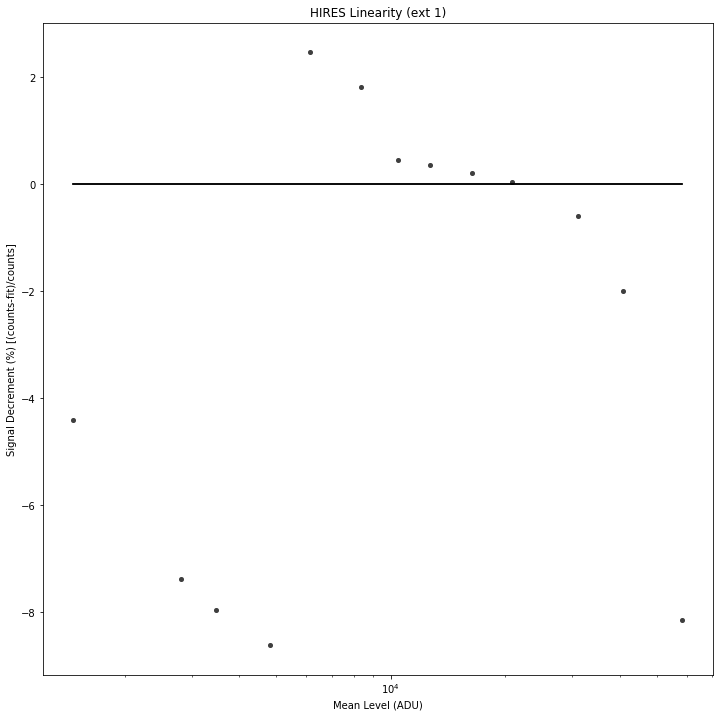

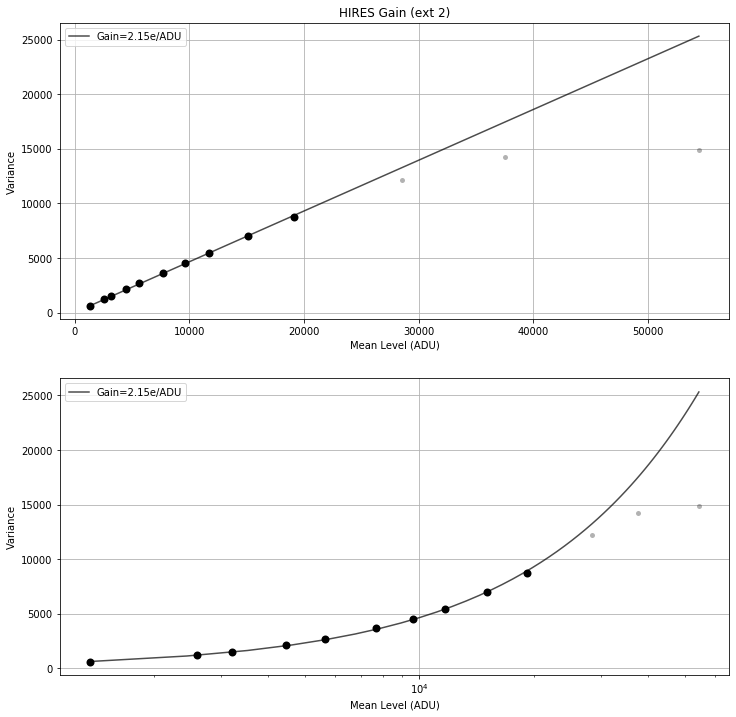

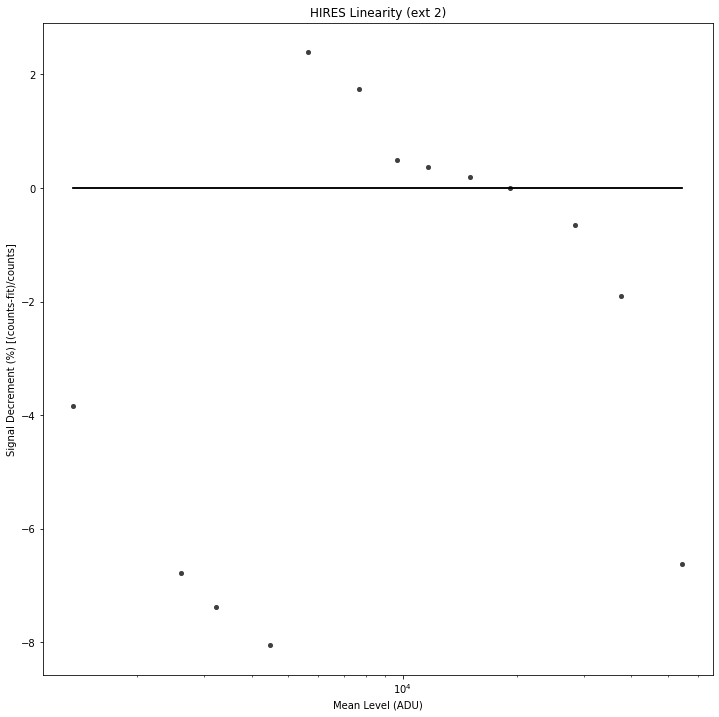

In [12]:
g = analysis.determine_gain(flats2_kdl, master_bias=master_bias, read_noise=RN, trim=256, aduthreshold=25000, plot=True)
for i,gi in enumerate(g):
    print(f"Gain (ext {i}) = {gi:.2f}")
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r*g[i]:.2f}")